In [29]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy.optimize import minimize

0.2 a The Friis free space equation consists of:

$$P_r = P_t + 20 \times \log^{10}{\frac{c}{4\pi f r}}$$

where P_t equals the transmission power, c the speed of sound, f the frequency and r the distance. Plotting this for f is 2.4Ghz and r between 0.4 and 30 metres results in the plot down below. As we can see the router is more sensitive to devices that are closer to the router. The difference in signal strength between devices that are 1 and 2 meters from the router is greater than the difference in signal strength between devices that are 10 and 11 meters from the router.

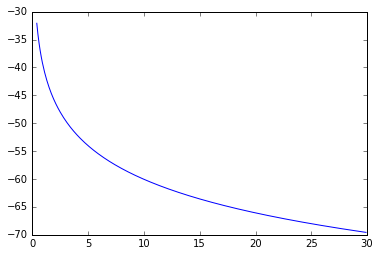

In [30]:
c  = scipy.constants.speed_of_light
f  = 2.4e9
r  = np.arange(0.4, 30, 0.1)
Pt = 0
P  = Pt + 20 * np.log10(c/(4.* np.pi * f * r))

plt.figure(1)
plt.plot(r,P)
plt.show()

b: This equation can also be inverted to r as a function of P_r:
    
$$r = \frac{c}{4 \pi f 10^{\frac{P_r - P_t}{20}}}$$

In [31]:
def getDistance(Pr):
    return c/(4*np.pi*f*math.pow(10, (Pr-Pt)/20))

d30 = getDistance(-31) - getDistance(-30)
d60 = getDistance(-61) - getDistance(-60)

print("The difference in metres between -30 to -31 and -60 to -61 is:", d30, "and", d60)

The difference in metres between -30 to -31 and -60 to -61 is: 0.03835527636485858 and 1.2129003359817592


c: As can be seen above, the difference in distance between 30 and 31 dBm is 0.0384 metres and between -60 and -61 dBm is 1.21 metres. This that with a lower signal strength the difference in strength has a larger influence on the difference in distance.

d: This also means that the uncertainty for the distance is larger when the signal strength is smaller. As an error in the measured signal strength has a larger influance on the resulting calculated distance.

e: In order to reconstruct the location of the client triangulation can be used. There excists unfortunatly no exact solution as can be seen in the picture below:

**MARTIJN PLAATJE PAINT :D**

f: To Calculate the signal strength of a client at a certain location with a certain router the original formula can be rewritten to:

$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f r}})$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}({r}))$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}))$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(((x-x_i)^2 + (y-y_i)^2 + Z^2)^\frac{1}{2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 10 \times \log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)$$



g: 

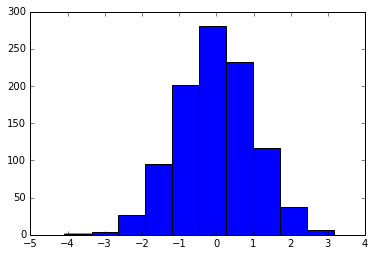

The mean and deviation are: -0.0155432675749 and 1.01665626926


In [32]:
def getExpectedStrength(x, y, xi, yi, Z, Pt):
    return (Pt + 20 * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)))

def getMeassuredStrength(x, y, xi, yi, Z, Pt, G, sigma, noise=None):
    if(not noise): 
        noise = np.random.normal(0, sigma);
    return (Pt + G * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)) +
            noise)
Z = 2
G = 20

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

h: If you underestimatethe noise/fluctuations/measurement uncertainties, the deviation gets smaller. If you overestimate, the deviation will get larger, meaning you are even more uncertain about your predictions.

The mean and deviation when underestimating are: -0.0250603340757 and 1.93188460619


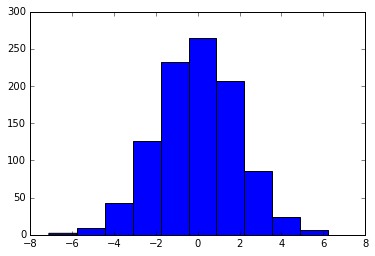

The mean and deviation when overestimating are: -0.00626508351893 and 0.482971151547


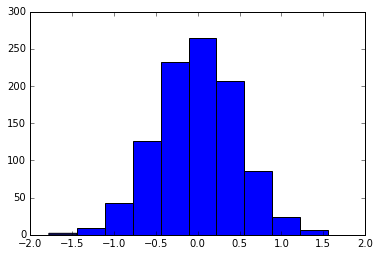

In [35]:
sigma = 2
G = 20
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]

# Underestimate
nRisiduals = (meassurements - expectedStrength)/1
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when underestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

# Overestimate
nRisiduals = (meassurements - expectedStrength)/4
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when overestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

i: The mean is no longer at zero, which means that there is an single error that affects all measurements.

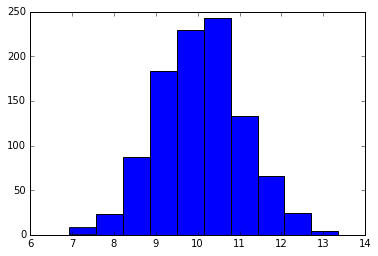

The mean and deviation are: 10.0503780772 and 1.01731804715


In [37]:
G = 15

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

j: In general, we would like to see a mean of zero and a deviation of one in my pull distribution.

k: When generating a single wifi packet without noise and an assumed sigma of 1dBm, the $\chi^{2}$ is at its minimum at (5,5) which is the actual position:

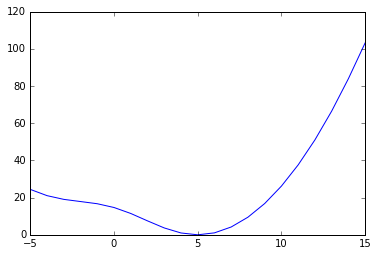

In [38]:
def estimatePositionWithoutNoise(routers, assumedClient, actualClient, sigma, G, Pt):
    x,y,z = assumedClient
    xreal, yreal, zreal = actualClient
    Chi = 0
    for xi,yi,zi in routers:
        Z = zi - z
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = getExpectedStrength(xreal,yreal,xi,yi,zreal-zi,Pt)
        Chi += math.pow(Si-Pri,2)/math.pow(sigma,2)
    return Chi



routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
actualClient = [5,5,1]
X = np.arange(-5,16,1)
Chis = [[x, estimatePositionWithoutNoise(routers, [x,5,1], actualClient, 1, 20, 0)] for x in X]

Chis = np.matrix(Chis)
plt.plot(Chis[:,0],Chis[:,1])
plt.show()

l: When generating a single wifi packet with random Gaussian noise and a sigma of 1dBm, the $\chi^{2}$ is at its minimum around (5,5) which is the actual position, but not necessarily exactly at (5,5. If you run it different times, the minimum stays around (5,5) sometimes actually being at (5,5) but not always.

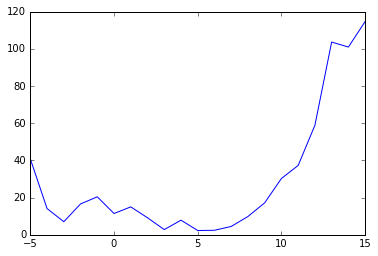

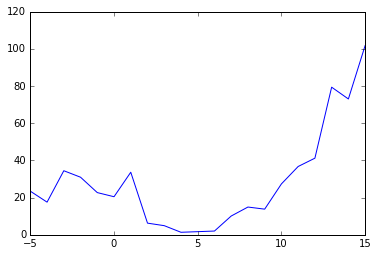

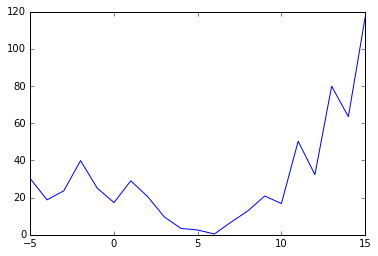

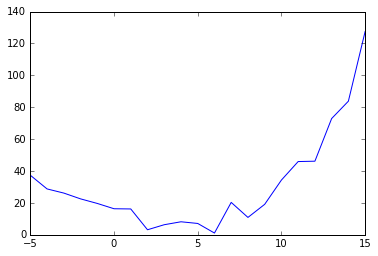

In [42]:
def estimatePositionWithNoise(routers, assumedClient, actualClient, sigma, G, Pt, noise, unc=sigma):
    x,y,z = assumedClient
    xreal, yreal, zreal = actualClient
    Chi = 0
    for i,[xi,yi,zi] in enumerate(routers):
        Z = zi - z
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = getMeassuredStrength(xreal,yreal, xi, yi, zreal-zi, Pt, G, sigma, noise[i])
        
        Chi += math.pow(Si-Pri,2)/math.pow(unc,2)
    return Chi

routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
actualClient = [5,5,1]
X = np.arange(-5,16,1)
noise = [np.random.normal(0, 1) for x in range(4)]
#Chis = [[x, estimatePositionWithNoise(routers, [x,5,1], actualClient, 1, 20, 0, noise)] for x in X]
for i in range(0,4):
    Chis = []
    for x in X:
        noise = [np.random.normal(0, 1) for x in range(4)]
        Chis.append([x, estimatePositionWithNoise(routers, [x,5,1], actualClient, 1, 20, 0, noise)])

    Chis = np.matrix(Chis)
    plt.plot(Chis[:,0],Chis[:,1])
    plt.show()

m: The minimize function (the Powell method) will find the optimum of the estimated position at location (5,5).

In [43]:
def g(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithoutNoise(routers, [x,y,1], actualClient, 1, 20, 0)

print(minimize(g,[3,8], method='Powell').x)
    

[ 5.  5.]


0.4n: The average estimated position is quite good (around (5,5)), the $\chi^{2}$ value is also close to the expected value of 2. We expect it to be 2 since the number of datapoints (routers) is 4 and the number of parameters is 2 (x and y position).

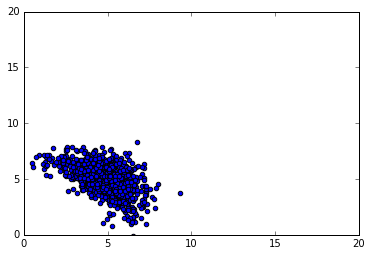

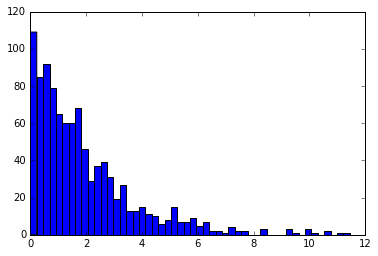

Chi squared = 1.92153399654
Position = [[ 4.83092069  4.992437  ]]


In [51]:
noise = []

def g2(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithNoise(routers, [x,y,1], actualClient, 1 ,20, 0, noise)

results = []
Chis = []
#print(minimize(g2,[10,10], method='Powell'))

for i in range(0,1000):
    noise = [np.random.normal(0, 1) for x in range(4)]
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    results.append(minimized.x)
    Chis.append(minimized.fun)

results = np.matrix(results)
plt.scatter(results[:,0],results[:,1])
plt.ylim(0,20)
plt.xlim(0,20)
plt.show()

plt.hist(Chis, bins=50)
plt.show()

print("Chi squared =", np.mean(Chis))
print("Position =", results.mean(0))

o: The average $\chi^{2}$ value of the minimums agrees with the NDoF which is 4 - 2 = 2 (number of routers - number of parameters).

p: The minimums hisogram (green in the histogram below) seems to agree with the $\chi^{2}$ histogram (blue in the histogram below) quite well.

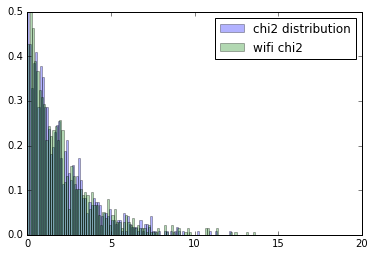

In [45]:
plt.hist(np.random.chisquare(2,1000), alpha=0.3, bins=100,label='chi2 distribution',normed=True)
plt.hist(Chis, bins=100, alpha=0.3, label='wifi chi2', normed=True)
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()


q: The cloud of estimated device positions became more scattered, because we added Gaussian noise with a sigma of 2 while we used a sigma of 1 as an estimation. The $\chi^{2}$ became higher, which is to be expected when we underestimate the noise in our model. The $\chi^{2}$ distribution is more flat than we'd expect, this is also because we underestimate the noise.

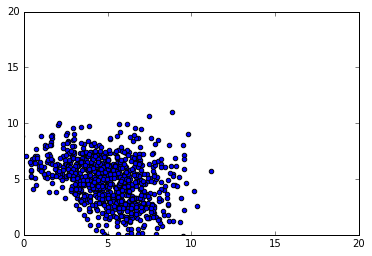

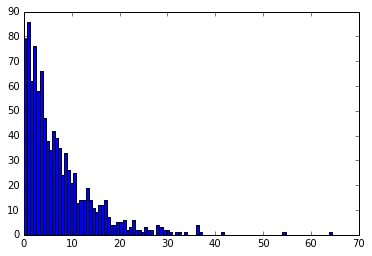

The average chi-squared is: 7.14187385311
The average position is: [[ 4.36870989  4.40498618]]


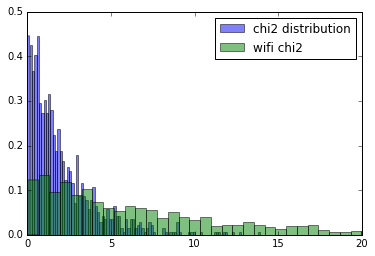

In [55]:
noise = []

def g2(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithNoise(routers, [x,y,1], actualClient, 2 ,20, 0, noise, 1)

results = []
Chis = []
#print(minimize(g2,[10,10], method='Powell'))

for i in range(0,1000):
    noise = [np.random.normal(0, 2) for x in range(4)]
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    results.append(minimized.x)
    Chis.append(minimized.fun)

results = np.matrix(results)
plt.scatter(results[:,0],results[:,1])
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

plt.hist(Chis, bins=100)
plt.show()

print("The average chi-squared is:", np.mean(Chis))
print("The average position is:", results.mean(0))

plt.hist(np.random.chisquare(2,1000), alpha=0.5, bins=100,label='chi2 distribution',normed=True)
plt.hist(Chis, bins=100, alpha=0.5, label='wifi chi2', normed=True)
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()

r: When the average minimim $\chi^{2}$ value is much higher than the NDoF, it means that either the model is wrong or the measurement/data uncertainties have been underestimated. Experimenting with the uncertainties should explain whether the model was wrong or the initia


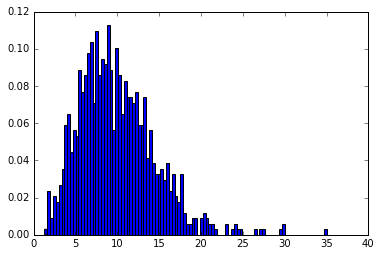

In [47]:
plt.hist(np.random.chisquare(10,1000), bins=100,label='chi2 distribution',normed=True)
plt.show()